# Prediction Churn on Telco Customer dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn
import xgboost as xgb

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
import os



In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv('dataset_telcochurn.csv')

# Dataset Description

| Feature Name	| Description |	
| :---        |    :----:   |  
| customerID |	Contains customer ID |	categorical
| gender |	whether the customer female or male |	categorical
| SeniorCitizen |	Whether the customer is a senior citizen or not (1, 0) |	numeric, int
| Partner |	Whether the customer has a partner or not (Yes, No) |	categorical
| Dependents |	Whether the customer has dependents or not (Yes, No) |	categorical
| tenure |	Number of months the customer has stayed with the company |	numeric, int
| PhoneService |	Whether the customer has a phone service or not (Yes, No) |	categorical
| MultipleLines |	Whether the customer has multiple lines r not (Yes, No, No phone service) |	categorical
| InternetService |	Customer’s internet service provider (DSL, Fiber optic, No) |	categorical
| OnlineSecurity |	Whether the customer has online security or not (Yes, No, No internet service) |	categorical
| OnlineBackup |	Whether the customer has online backup or not (Yes, No, No internet service) |	categorical
| DeviceProtection |	Whether the customer has device protection or not (Yes, No, No internet service) |	categorical
| TechSupport |	Whether the customer has tech support or not (Yes, No, No internet service) |	categorical
| streamingTV |	Whether the customer has streaming TV or not (Yes, No, No internet service) |	categorical
| streamingMovies |	Whether the customer has streaming movies or not (Yes, No, No internet service) |	categorical
| Contract |	The contract term of the customer (Month-to-month, One year, Two year) |	categorical
| PaperlessBilling |	Whether the customer has paperless billing or not (Yes, No) |	categorical
| PaymentMethod |	The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card) |	categorical
| MonthlyCharges |	The amount charged to the customer monthly |	numeric , int
| TotalCharges |	The total amount charged to the customer |	object
| Churn |	Whether the customer churned or not (Yes or No) |	categorical

# Data Exploration

In [4]:
print('Dataset shape: ',df.shape)
df.head(10)

Dataset shape:  (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')  #converting series object dataset into numeric

df.TotalCharges.dtypes

dtype('float64')

In [8]:
missing_data = df.isnull().sum(axis=0)  #checking missing value
missing_data = missing_data[missing_data > 0]
missing_data

TotalCharges    11
dtype: int64

In [9]:
df['TotalCharges']=df['TotalCharges'].fillna(0) #Handling missing value

Visualize dataset

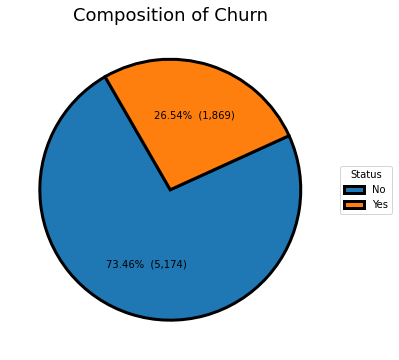

In [10]:
# Calculate value counts for 'Churn' column
value_count = df.Churn.value_counts()

# Create a pie chart to visualize the composition of 'Churn'
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Churn", "Not Churn"]
plt.title('Composition of Churn', fontsize=18)

data = [value_count[0], value_count[1]]

# Plot pie chart
plt.pie(data, explode=(0, 0),
        textprops=dict(size=10, color="black"),
        autopct=lambda p: '{:.2f}%  ({:,.0f})'.format(p, p * sum(data) / 100), startangle=120,
        wedgeprops=dict(edgecolor="black", linewidth=3))

# Set legend with labels and title
labels = 'No', 'Yes'
plt.legend(labels, title='Status', loc='center', bbox_to_anchor=(1, 0, 0.2, 1))


In [11]:
df=pd.get_dummies(df,columns=['Churn'],drop_first=True) #one hot encoding for Churn column

In [12]:
df['Churn_Yes'].value_counts()

0    5174
1    1869
Name: Churn_Yes, dtype: int64

In [13]:
def stack_plot(data, xtick, col2='Churn_Yes', col3='total'):
    # Define for distribution data
    ind = np.arange(data.shape[0])

    # Set figure size based on the number of unique values in xtick
    if len(data[xtick].unique()) < 5:
        plt.figure(figsize=(5, 5))
    elif len(data[xtick].unique()) >= 5 and len(data[xtick].unique()) < 10:
        plt.figure(figsize=(7, 7))
    else:
        plt.figure(figsize=(10, 10))

    # Plot stacked bar chart
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Count')

    # Set x-axis tick labels and rotation
    plt.xticks(ticks=ind, rotation=90, labels=list(data[xtick].values))

    # Set legend
    plt.legend((p1[0], p2[0]), ('Not Churn', 'Yes'))

    plt.show()


In [14]:
def barplots(data, col1, col2='Churn_Yes', top=False):
    # Create a DataFrame with aggregated values
    temp = pd.DataFrame(df.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Add total and average columns to the DataFrame
    temp['total'] = pd.DataFrame(df.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(df.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']

    # Call stack_plot function to visualize the data
    stack_plot(temp, xtick=col1, col2=col2, col3='total')

    # Print the DataFrame
    print(temp)

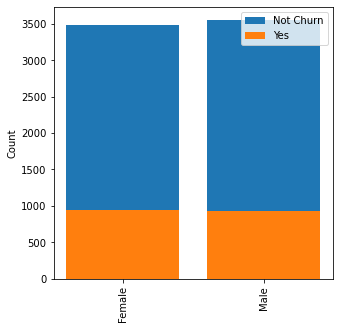

   gender  Churn_Yes  total       Avg
0  Female        939   3488  0.269209
1    Male        930   3555  0.261603


In [15]:
barplots(data,'gender','Churn_Yes')

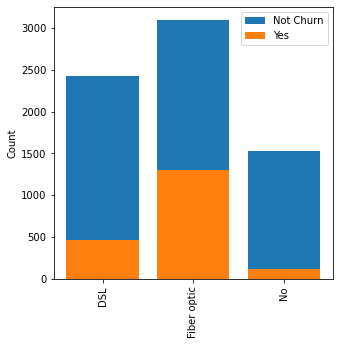

  InternetService  Churn_Yes  total       Avg
0             DSL        459   2421  0.189591
1     Fiber optic       1297   3096  0.418928
2              No        113   1526  0.074050


In [16]:
barplots(data,'InternetService','Churn_Yes')

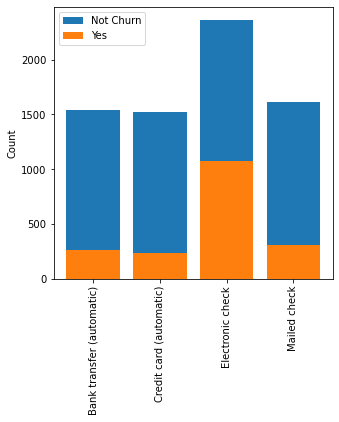

               PaymentMethod  Churn_Yes  total       Avg
0  Bank transfer (automatic)        258   1544  0.167098
1    Credit card (automatic)        232   1522  0.152431
2           Electronic check       1071   2365  0.452854
3               Mailed check        308   1612  0.191067


In [17]:
barplots(data,'PaymentMethod','Churn_Yes')

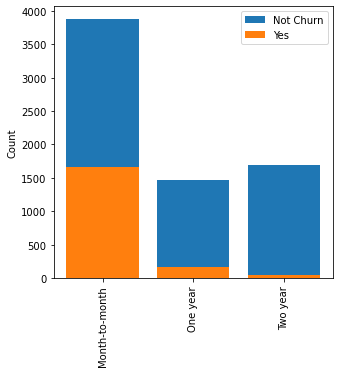

         Contract  Churn_Yes  total       Avg
0  Month-to-month       1655   3875  0.427097
1        One year        166   1473  0.112695
2        Two year         48   1695  0.028319


In [18]:
barplots(data,'Contract','Churn_Yes')

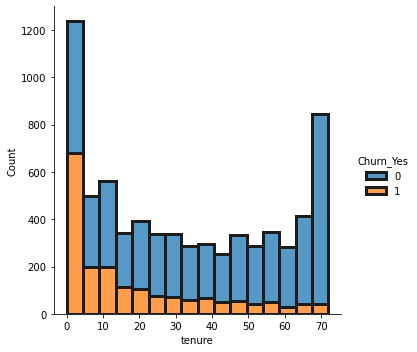

In [19]:
sns.displot(df,x='tenure',hue='Churn_Yes',edgecolor = "#1c1c1c", linewidth = 3,stat='count',multiple='stack')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

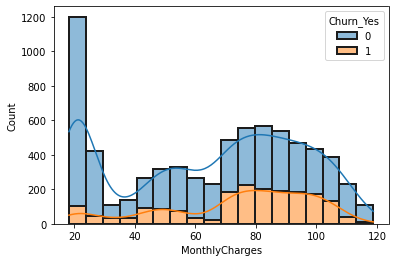

In [20]:

sns.histplot(df,x='MonthlyCharges',hue='Churn_Yes',kde=True,multiple='stack',element='bars',bins='auto',edgecolor = "#1c1c1c", linewidth = 2)

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

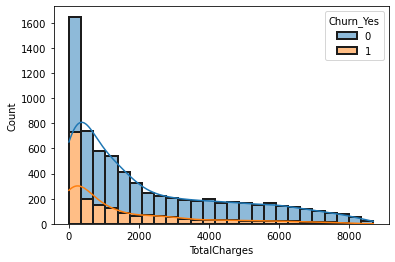

In [21]:
sns.histplot(df,x='TotalCharges', hue='Churn_Yes',kde=True,multiple='stack',element='bars',bins='auto',edgecolor = "#1c1c1c", linewidth = 2)

# Data Preparation

In [22]:
df=df.drop(['customerID'],axis=1) #Drop unimportant data

In [23]:
missing_data = df.isna().sum()
missing_data = [missing_data>0]
missing_data

[gender              False
 SeniorCitizen       False
 Partner             False
 Dependents          False
 tenure              False
 PhoneService        False
 MultipleLines       False
 InternetService     False
 OnlineSecurity      False
 OnlineBackup        False
 DeviceProtection    False
 TechSupport         False
 StreamingTV         False
 StreamingMovies     False
 Contract            False
 PaperlessBilling    False
 PaymentMethod       False
 MonthlyCharges      False
 TotalCharges        False
 Churn_Yes           False
 dtype: bool]

In [24]:
catcol = [col for col in df.columns if df[col].dtype == "object"] #encoding data
le = LabelEncoder()
label_mapping = {}
for col in catcol:
        df[col] = le.fit_transform(df[col])
        label_mapping[col] = dict(zip(le.classes_,le.transform(le.classes_)))\
        
label_mapping

{'gender': {'Female': 0, 'Male': 1},
 'Partner': {'No': 0, 'Yes': 1},
 'Dependents': {'No': 0, 'Yes': 1},
 'PhoneService': {'No': 0, 'Yes': 1},
 'MultipleLines': {'No': 0, 'No phone service': 1, 'Yes': 2},
 'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
 'OnlineSecurity': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'OnlineBackup': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'DeviceProtection': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'TechSupport': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'StreamingTV': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'StreamingMovies': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
 'PaperlessBilling': {'No': 0, 'Yes': 1},
 'PaymentMethod': {'Bank transfer (automatic)': 0,
  'Credit card (automatic)': 1,
  'Electronic check': 2,
  'Mailed check': 3}}

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Yes
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Correlation

In [26]:
df2=df.corr().Churn_Yes.sort_values(ascending=False).reset_index()
df2.head(10)

,index,Churn_Yes
0,Churn_Yes,1.000000
1,MonthlyCharges,0.193356
2,PaperlessBilling,0.191825
3,SeniorCitizen,0.150889
4,PaymentMethod,0.107062
5,MultipleLines,0.038037
6,PhoneService,0.011942
7,gender,-0.008612
8,StreamingTV,-0.036581
9,StreamingMovies,-0.038492


Split

In [27]:
X=df.drop(['Churn_Yes'],1)
y=df[['Churn_Yes']].values.reshape(-1,1)

oversample = RandomOverSampler(sampling_strategy=1)
X_over, y_over = oversample.fit_resample(X, y)

train_X,test_X,train_y,test_y = train_test_split(X_over,y_over,test_size=0.2,random_state=0)


# Machine Learning Modelling

Decision Tree

In [28]:
dtr=DecisionTreeClassifier()
dtr.fit(train_X,train_y)
cv_scores = cross_val_score(dtr, X_over, y_over, cv=5,scoring='accuracy')  # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [0.85555556 0.85362319 0.88454106 0.88883519 0.90043499]


<AxesSubplot:>

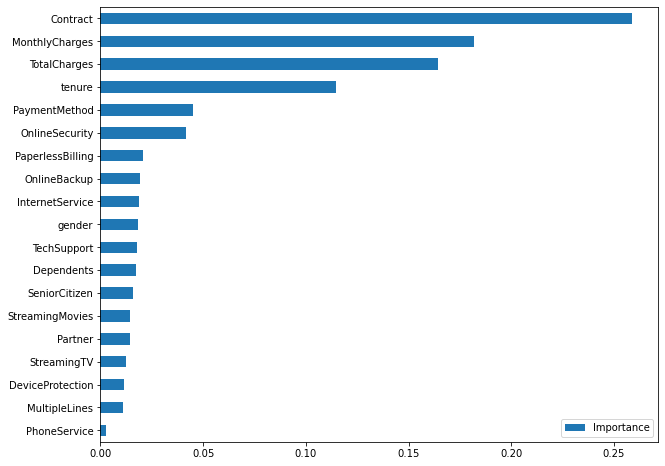

In [29]:
feat_importances = pd.DataFrame(dtr.feature_importances_, index=test_X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=True, inplace=True)
feat_importances.plot(kind='barh',figsize=(10,8))


In [30]:
dtr_pred=dtr.predict(test_X) # Predictions on the test set

dtr_conf=confusion_matrix(test_y,dtr_pred) # Confusion Matrix
dtr_report=classification_report(test_y,dtr_pred) # Classification Report
dtr_acc=round(accuracy_score(test_y,dtr_pred)*100,ndigits=3) # Accuracy Score
dtr_rocauc=roc_auc_score(test_y, dtr_pred) #ROC AUC score

# Print the result
print(f"Confusion Matrix : \n\n{dtr_conf}")
print(f"\nClassification Report : \n\n{dtr_report}")
print(f"\nThe Accuracy of Decision Tree is {dtr_acc} %")
print(f'ROC AUC Score with Decision Tree: {dtr_rocauc}')

Confusion Matrix : 

[[805 228]
 [ 57 980]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1033
           1       0.81      0.95      0.87      1037

    accuracy                           0.86      2070
   macro avg       0.87      0.86      0.86      2070
weighted avg       0.87      0.86      0.86      2070


The Accuracy of Decision Tree is 86.232 %
ROC AUC Score with Decision Tree: 0.8621586955446169


Random forest

In [31]:
rfc = RandomForestClassifier() 
rfc.fit(train_X,train_y)
cv_scores = cross_val_score(rfc, X_over, y_over, cv=5, scoring='accuracy')  # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')


Cross-Validation Scores: [0.8826087  0.88405797 0.90531401 0.91155147 0.92363461]


In [32]:
rfc_pred = rfc.predict(test_X) # Predict on the test data set

rfc_conf = confusion_matrix(test_y, rfc_pred) #Confusion Matrix
rfc_report = classification_report(test_y, rfc_pred) # Classification Report
rfc_acc = round(accuracy_score(test_y, rfc_pred)*100, ndigits = 2) # Accuracy Score
rfc_rocauc=roc_auc_score(test_y, rfc_pred) #ROC AUC Score

#Print the results
print(f"Confusion Matrix : \n\n{rfc_conf}")
print(f"\nClassification Report : \n\n{rfc_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfc_acc} %")
print(f'ROC AUC score wiht Random Forest: {rfc_rocauc}')

Confusion Matrix : 

[[859 174]
 [ 52 985]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1033
           1       0.85      0.95      0.90      1037

    accuracy                           0.89      2070
   macro avg       0.90      0.89      0.89      2070
weighted avg       0.90      0.89      0.89      2070


The Accuracy of Random Forest Classifier is 89.08 %
ROC AUC score wiht Random Forest: 0.8907069596283119


Logistic Regresion

In [33]:
lr=LogisticRegression()
lr.fit(train_X,train_y)
cv_scores = cross_val_score(lr, X_over, y_over, cv=5) # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [0.76521739 0.76135266 0.76086957 0.77960367 0.76413726]


In [34]:
lr_pred = lr.predict(test_X) #Predict on the test dataset

lr_conf = confusion_matrix(test_y, lr_pred) # Confusion Matrix
lr_report = classification_report(test_y, lr_pred) #Classification Report
lr_acc = round(accuracy_score(test_y, lr_pred)*100, ndigits = 2) #Accuracy Score
lr_rocauc=roc_auc_score(test_y, lr_pred) #ROC AUC Score

#Print the results
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Reggresion is {lr_acc} %")
print(f'ROC AUC score wiht Logistic Reggresion: {lr_rocauc}')

Confusion Matrix : 

[[765 268]
 [230 807]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1033
           1       0.75      0.78      0.76      1037

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070


The Accuracy of Logistic Reggresion is 75.94 %
ROC AUC score wiht Logistic Reggresion: 0.7593839179777095


Gradien Boost

In [35]:
gradien=GradientBoostingClassifier()
gradien.fit(train_X,train_y)
cv_scores = cross_val_score(gradien, X_over, y_over, cv=5,scoring='accuracy')  # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [0.77004831 0.77681159 0.77584541 0.80521991 0.7897535 ]


In [36]:
gradien_pred=gradien.predict(test_X) # Predict on the test dataset

gradien_conf=confusion_matrix(test_y,gradien_pred) #Confusion Matrix
gradien_report=classification_report(test_y,gradien_pred) #Classification Matrix
gradien_acc=round(accuracy_score(test_y,gradien_pred)*100,ndigits=3) # Accuracy Score
gradien_rocauc=roc_auc_score(test_y, gradien_pred) #ROC AUC Score

# Print the results
print(f"Confusion Matrix : \n\n{gradien_conf}")
print(f"\nClassification Report : \n\n{gradien_report}")
print(f"\nThe Accuracy of Gradien Boost is {gradien_acc} %")
print(f'ROC AUC score wiht Gradien Boost: {gradien_rocauc}')

Confusion Matrix : 

[[769 264]
 [192 845]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1033
           1       0.76      0.81      0.79      1037

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070


The Accuracy of Gradien Boost is 77.971 %
ROC AUC score wiht Gradien Boost: 0.7796421093313146


GauusianNB

In [37]:
gnb=GaussianNB()
gnb.fit(train_X,train_y)
cv_scores = cross_val_score(gnb, X_over, y_over, cv=3,scoring='accuracy')  # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [0.75275362 0.75558133 0.76398956]


In [38]:
gnb_pred=gnb.predict(test_X)
gnb_conf=confusion_matrix(test_y,gnb_pred)
gnb_report=classification_report(test_y,gnb_pred)
gnb_acc=round(accuracy_score(test_y,gnb_pred)*100,ndigits=3)
gnb_rocauc=roc_auc_score(test_y, gnb_pred)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian is {gnb_acc} %")
print(f'ROC AUC Score with Gaussian Naive Bayes: {gnb_rocauc}',)

Confusion Matrix : 

[[723 310]
 [216 821]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1033
           1       0.73      0.79      0.76      1037

    accuracy                           0.75      2070
   macro avg       0.75      0.75      0.75      2070
weighted avg       0.75      0.75      0.75      2070


The Accuracy of Gaussian is 74.589 %
ROC AUC Score with Gaussian Naive Bayes: 0.745805020625996


XGBoost

In [39]:
xgboost= XGBClassifier()
xgboost.fit(train_X,train_y)
cv_scores = cross_val_score(xgboost, X_over, y_over, cv=5, scoring='accuracy')  # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [0.84396135 0.84396135 0.85845411 0.8699855  0.8777187 ]


In [40]:
xgboost_pred = xgboost.predict(test_X) # Predictions on the test set

xgboost_conf = confusion_matrix(test_y, xgboost_pred) # Confusion Matrix
xgboost_report = classification_report(test_y, xgboost_pred) # Classification Report
xgboost_acc = round(accuracy_score(test_y, xgboost_pred) * 100, ndigits=3) # Accuracy Score
xgboost_rocauc = roc_auc_score(test_y, xgboost_pred) # ROC AUC Score

# Print Results
print(f"Confusion Matrix : \n\n{xgboost_conf}")
print(f"\nClassification Report : \n\n{xgboost_report}")
print(f"\nThe Accuracy of XGB is {xgboost_acc} %")
print(f'ROC AUC Score with XGBOOST: {xgboost_rocauc}')


Confusion Matrix : 

[[808 225]
 [ 77 960]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1033
           1       0.81      0.93      0.86      1037

    accuracy                           0.85      2070
   macro avg       0.86      0.85      0.85      2070
weighted avg       0.86      0.85      0.85      2070


The Accuracy of XGB is 85.411 %
ROC AUC Score with XGBOOST: 0.8539675753182584


In [41]:
results = pd.DataFrame([["XGBoost Classifier", xgboost_acc, xgboost_rocauc],
                        ["Decision Tree Classifier", dtr_acc, dtr_rocauc], 
                        ["Gaussian naive bayes classifier", gnb_acc, gnb_rocauc],
                        ["Gradien Boost Classifier", gradien_acc, gradien_rocauc],
                        ["Random Forest Classifier", rfc_acc, rfc_rocauc],
                        ["Logistic Regression",lr_acc,lr_rocauc]],
                        columns = ["Models", "Testing Accuracy Score", "ROC AUC Score"])

results.sort_values(by=['Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='YlOrRd')

,Models,Testing Accuracy Score,ROC AUC Score
4,Random Forest Classifier,89.080000,0.890707
1,Decision Tree Classifier,86.232000,0.862159
0,XGBoost Classifier,85.411000,0.853968
3,Gradien Boost Classifier,77.971000,0.779642
5,Logistic Regression,75.940000,0.759384
2,Gaussian naive bayes classifier,74.589000,0.745805
